In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

%matplotlib inline
warnings.filterwarnings("ignore")
wine = pd.read_csv('winequality-red 2.csv')
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


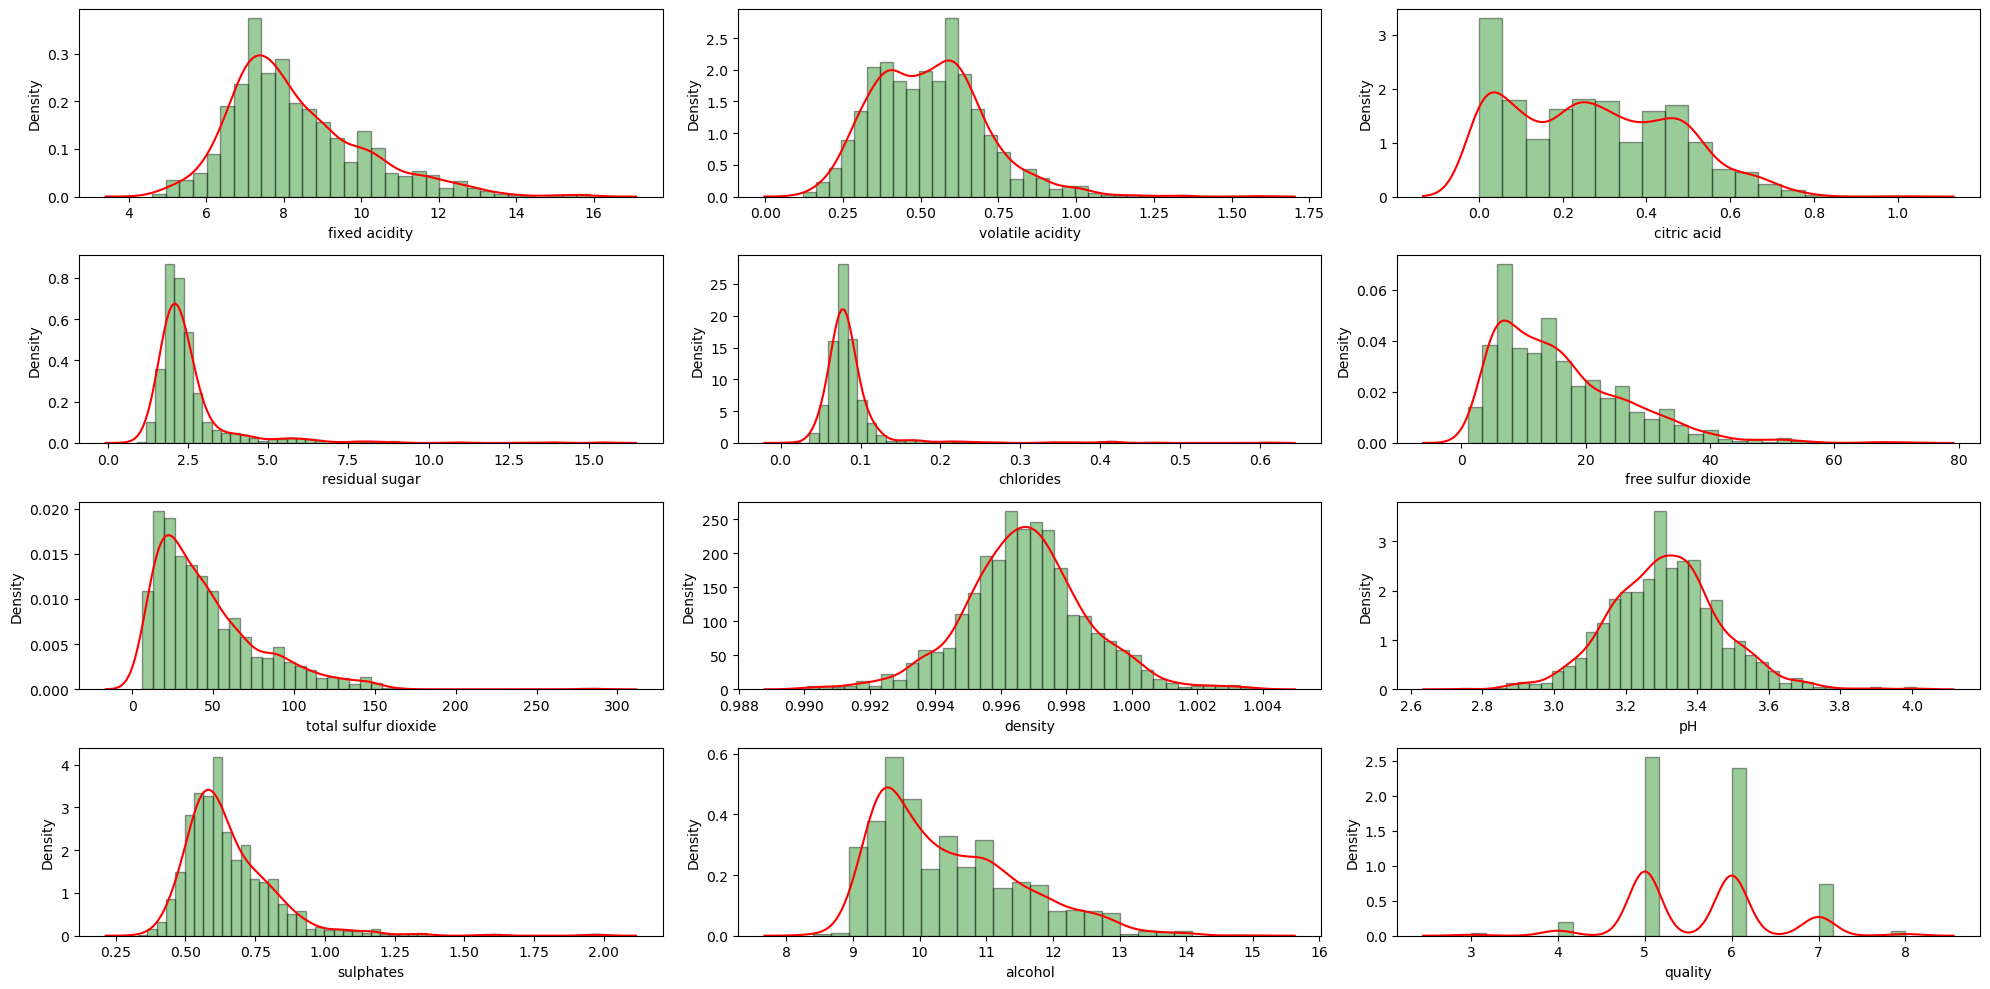

In [2]:
fig = plt.figure(figsize = [20,10])
cols = wine.columns
cnt = 1
for col in cols :
  plt.subplot(4,3,cnt)
  sns.distplot(wine[col],hist_kws=dict(edgecolor="k",linewidth=1,color='green'),color='red')
  cnt+=1
plt.tight_layout()
plt.show()


<AxesSubplot:>

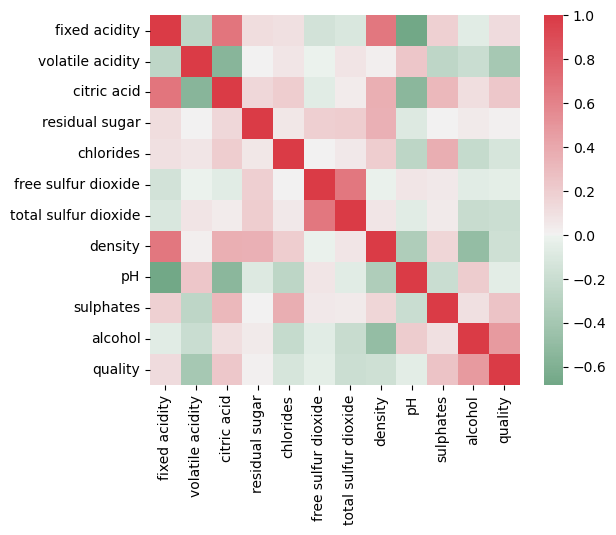

In [3]:
cmap = sns.diverging_palette(500,10,as_cmap=True)
sns.heatmap(wine.corr(), cmap=cmap,center=0,square=True)

In [4]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
ranges = (2,6.5,8) 
groups = ['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins=ranges,labels=groups)

In [6]:
le = LabelEncoder()
wine['quality'] = le.fit_transform(wine['quality'])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [7]:
wine['quality'].value_counts()


0    1382
1     217
Name: quality, dtype: int64

In [8]:
good_quality = wine[wine['quality']==1]
bad_quality = wine[wine['quality']==0]

bad_quality = bad_quality.sample(frac=1)
bad_quality = bad_quality[:217]

new_df = pd.concat([good_quality,bad_quality])
new_df = new_df.sample(frac=1)
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1422,7.0,0.540,0.00,2.1,0.079,39.0,55.0,0.99560,3.39,0.84,11.4,0
583,12.0,0.280,0.49,1.9,0.074,10.0,21.0,0.99760,2.98,0.66,9.9,1
996,5.6,0.660,0.00,2.2,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,1
658,7.2,0.520,0.07,1.4,0.074,5.0,20.0,0.99730,3.32,0.81,9.6,0
950,8.9,0.120,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1409,6.0,0.510,0.00,2.1,0.064,40.0,54.0,0.99500,3.54,0.93,10.7,0
799,9.4,0.500,0.34,3.6,0.082,5.0,14.0,0.99870,3.29,0.52,10.7,0
1059,8.9,0.480,0.53,4.0,0.101,3.0,10.0,0.99586,3.21,0.59,12.1,1
515,8.5,0.655,0.49,6.1,0.122,34.0,151.0,1.00100,3.31,1.14,9.3,0


In [9]:
new_df['quality'].value_counts()

0    217
1    217
Name: quality, dtype: int64

In [10]:
new_df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.505460
citric acid             0.324023
sulphates               0.314228
fixed acidity           0.149948
residual sugar          0.079482
free sulfur dioxide    -0.071053
pH                     -0.091380
chlorides              -0.151753
total sulfur dioxide   -0.169928
density                -0.193036
volatile acidity       -0.394844
Name: quality, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

X = new_df.drop('quality',axis=1) 
y = new_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
param = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000]}

grid_rf = GridSearchCV(RandomForestClassifier(),param,scoring='accuracy',cv=10,)
grid_rf.fit(X_train, y_train)

print('Best parameters --> ', grid_rf.best_params_)

# Wine Quality Prediction
pred = grid_rf.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

Best parameters -->  {'n_estimators': 300}
[[66 13]
 [11 54]]


              precision    recall  f1-score   support

           0       0.86      0.84      0.85        79
           1       0.81      0.83      0.82        65

    accuracy                           0.83       144
   macro avg       0.83      0.83      0.83       144
weighted avg       0.83      0.83      0.83       144



0.8333333333333334
